<a href="https://colab.research.google.com/github/Ritika-mishra412/-data-analysis-project-/blob/main/zomato_project_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# zomato data anlysis project using python

In [7]:
#question answer
# 1)what type of restaurant do the majority of customer order from?
# 2) how many votes has each type of restaurant received from costomer?
# 3) what are the ratings that the majority of restaurants have recieved?
# 4) Zomato has observed that the most couple order most have their food online. what is their average spending on each other?
# 5) which mode (online or offline) has received the maximum rating?
# 6) which type of restaurant receive more offline orders, so that zomato can provide customer with some good offers?

In [8]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [9]:
# create the dataframe
df = pd.read_csv('/content/Zomato data .csv')
print(df)

                      name online_order book_table   rate  votes  \
0                    Jalsa          Yes        Yes  4.1/5    775   
1           Spice Elephant          Yes         No  4.1/5    787   
2          San Churro Cafe          Yes         No  3.8/5    918   
3    Addhuri Udupi Bhojana           No         No  3.7/5     88   
4            Grand Village           No         No  3.8/5    166   
..                     ...          ...        ...    ...    ...   
143       Melting Melodies           No         No  3.3/5      0   
144        New Indraprasta           No         No  3.3/5      0   
145           Anna Kuteera          Yes         No  4.0/5    771   
146                 Darbar           No         No  3.0/5     98   
147          Vijayalakshmi          Yes         No  3.9/5     47   

     approx_cost(for two people) listed_in(type)  
0                            800          Buffet  
1                            800          Buffet  
2                            8

In [10]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [11]:
#convert the data type of column - rate
def handlerate(value):
    try:
        value = str(value).split('/')[0]
        return float(value)
    except:
        return None
df['rate'] = df['rate'].apply(handlerate)
print(df.head())


                    name online_order book_table  rate  votes  \
0                  Jalsa          Yes        Yes   4.1    775   
1         Spice Elephant          Yes         No   4.1    787   
2        San Churro Cafe          Yes         No   3.8    918   
3  Addhuri Udupi Bhojana           No         No   3.7     88   
4          Grand Village           No         No   3.8    166   

   approx_cost(for two people) listed_in(type)  
0                          800          Buffet  
1                          800          Buffet  
2                          800          Buffet  
3                          300          Buffet  
4                          600          Buffet  


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [13]:
#1)what type of restaurant do the majority of customer order from?


In [14]:
# type of resturant
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


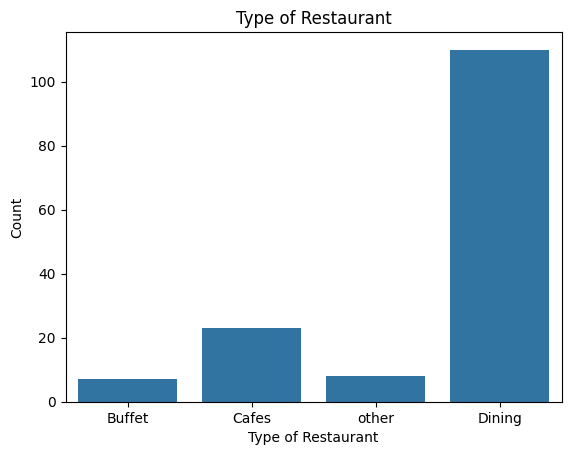

In [15]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('Type of Restaurant')
plt.ylabel('Count')
plt.title('Type of Restaurant')
plt.show()

In [16]:
#conclusion - majority of the restaurant falls in dining categories

2) how many votes has each type of restaurant received from costomer?**bold text**

In [17]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


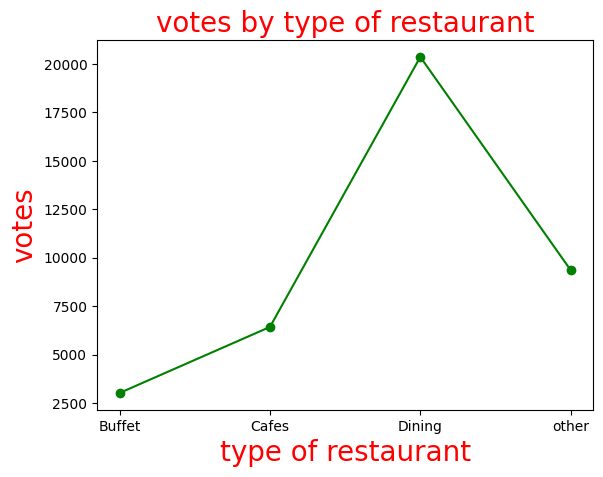

In [19]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes':grouped_data})
plt.plot(result, c="green", marker = "o")
plt.xlabel("type of restaurant", c="red", size=20)
plt.ylabel("votes", c="red", size=20)
plt.title("votes by type of restaurant", c="red", size=20)
plt.show()

In [20]:
#3) what are the ratings that the majority of restaurants have recieved?

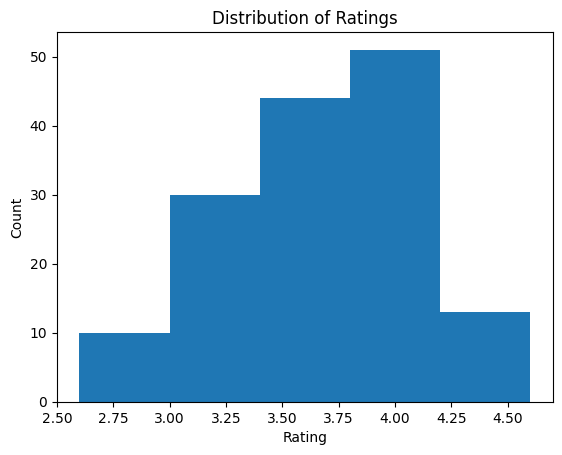

In [25]:
plt.hist(df['rate'],bins = 5)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')
plt.show()

In [26]:
#conclusion - the majority restaurants recieved ratings from 3.5 to 4

In [27]:
#4) Zomato has observed that the most couple order most have their food online. what is their average spending on each other

In [28]:
#average order spending by couple

In [29]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

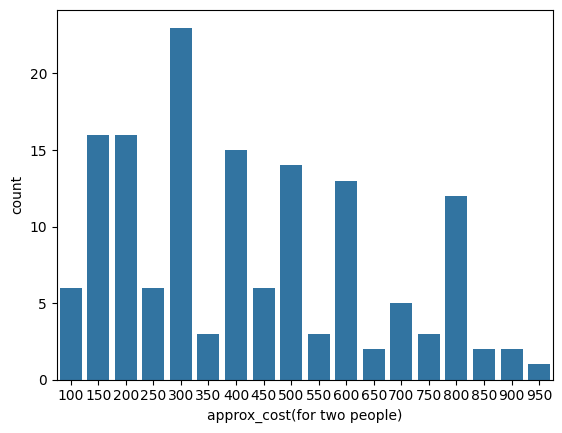

In [30]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

In [31]:
#5) which mode (online or offline) has received the maximum rating?

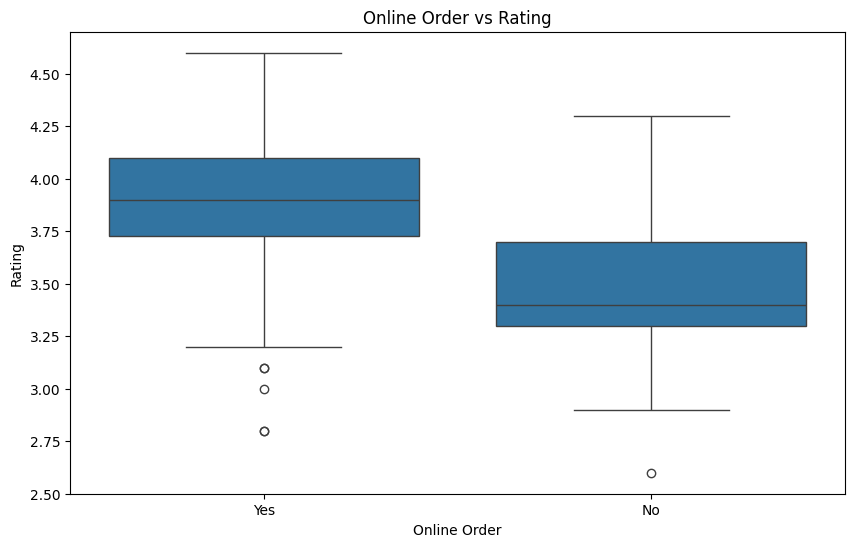

In [35]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='online_order', y='rate', data=df)
plt.xlabel('Online Order')
plt.ylabel('Rating')
plt.title('Online Order vs Rating')
plt.show()

In [36]:
# conclusion - offline order recived lower rating in comparision to online order

In [37]:
#6) which type of restaurant receive more offline orders, so that zomato can provide customer with some good offers?

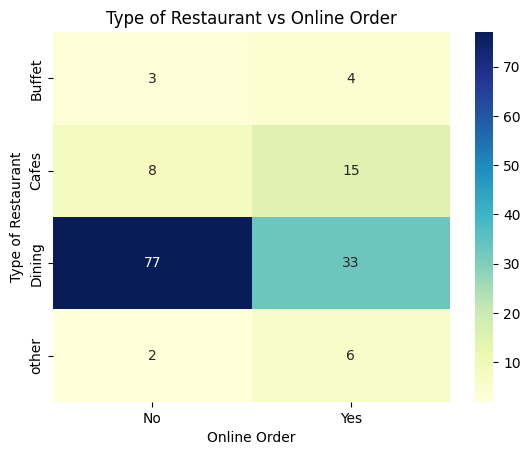

In [39]:
pivot_table =  df.pivot_table(index='listed_in(type)', columns='online_order', values='votes', aggfunc='size', fill_value=0)
sns.heatmap(pivot_table, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel('Online Order')
plt.ylabel('Type of Restaurant')
plt.title('Type of Restaurant vs Online Order')
plt.show()